# NTHS 2017 Exploratory Data Analysis 

This notebook constian some exploratory data analysis for telework questions in the NTHS - 2017 for the subsample of Bay Area residents. 

In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [14]:
## Load data 
persons = pd.read_csv('NHTS_2017_data/perpub.csv')
households = pd.read_csv('NHTS_2017_data/hhpub.csv')

In [15]:
## Filter Bay Area obsevations 
# 41860=San Francisco-Oakland-Hayward, CA (Weighted sample = 1,911,130)
# 41940=San Jose-Sunnyvale-Santa Clara, CA (Weighted sample = 630,210)
ba_filter = households['HH_CBSA'].isin(['41860','41940'])
print ('Bar area household sample size:', ba_filter.sum())

Bar area household sample size: 3248


In [16]:
## Bay area households 
ba_hh = households[ba_filter]

## Avoid duplicated columns (to preserve column name in future merge)
cols_to_use = persons.columns.difference(households.columns)
cols_to_use = list(cols_to_use)
cols_to_use.insert(0,'HOUSEID')

## Merge persons and households tables 
merge = persons[cols_to_use].merge(ba_hh, how = 'right', on = 'HOUSEID')
population = np.round(merge['WTPERFIN'].sum(), 0)

print ('Bar area persons sample size:', merge.shape[0])
print ('Bar area weighted persons sample size:', population)

Bar area persons sample size: 6772
Bar area weighted persons sample size: 6937089.0


## Demographic distributions 
- age 
- income 
- education 
- gender
- Sector

Min age: 5
Max age: 92
Mean age: 46.16


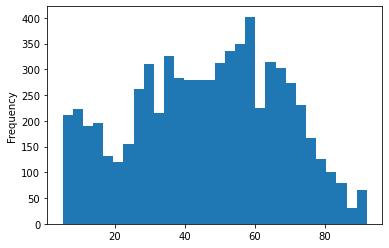

In [17]:
# Age
age_min, age_max, age_avg = merge['R_AGE_IMP'].min(), merge['R_AGE_IMP'].max(), merge['R_AGE_IMP'].mean()
print ('Min age: {}'.format(age_min))
print ('Max age: {}'.format(age_max))
print ('Mean age: {:.2f}'.format(age_avg))
merge['R_AGE_IMP'].plot.hist(bins = 30);

Data set only includes people over 5 years old. This could be a possible mismatch of the real bay area population. It is important to check age distribution from syntethic population, and compare it wiht the share of the population over 5 years old. 

It also seems that most of the people in the Bay are are within 25 and 60 years old (mostly workers) with a peak in the late 50's. Share of young population in relatively small - College ages seem to have the least share (18-22). Share of population +60 years decline linearly until the age of 92

Percentage of persons with no reported income: 0.86%


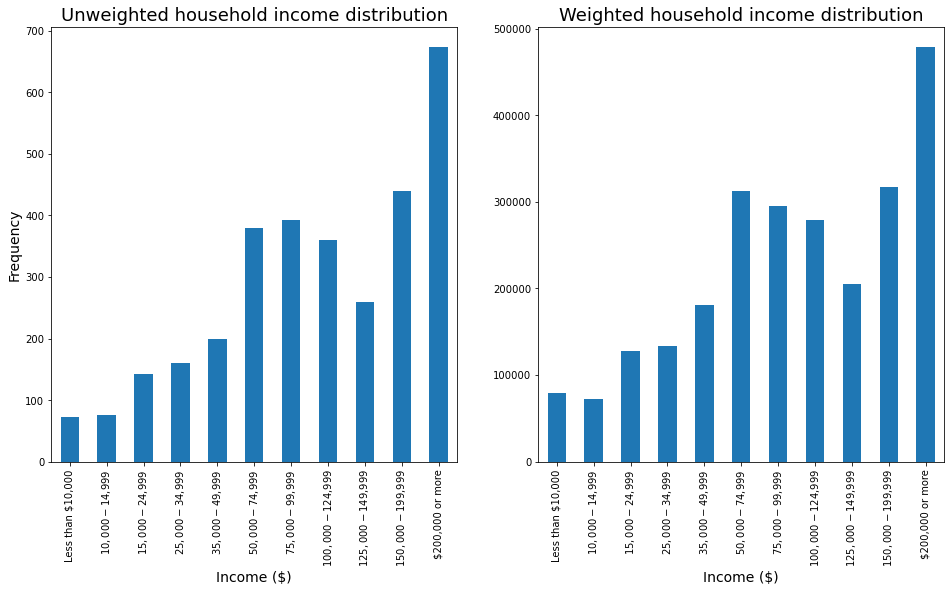

In [18]:
# Income 
# EDA at the household level

# %of households with no reported income (likely to be drop from the analysis )
no_income = ba_hh['HHFAMINC'].isin([-9, -8, -7])
no_income_pct = (ba_hh[no_income]['WTHHFIN'].sum()/population)*100
print ('Percentage of persons with no reported income: {:.2f}%'.format(no_income_pct))

#Drop no reporte income from analysis
income_name = {1:'Less than $10,000',
               2:'$10,000 - $14,999',
               3:'$15,000 - $24,999',
               4:'$25,000 - $34,999',
               5:'$35,000 - $49,999',
               6:'$50,000 - $74,999',
               7:'$75,000 - $99,999',
               8:'$100,000 - $124,999',
               9:'$125,000 - $149,999',
               10:'$150,000 - $199,999',
               11:'$200,000 or more'}

fig, axs = plt.subplots(1,2, figsize = (16,8))

to_plot_0 = ba_hh[~no_income]['HHFAMINC'].value_counts().sort_index().rename(income_name, axis = 0)
to_plot_0.plot.bar(ax = axs[0])
axs[0].set_xlabel('Income ($)', fontsize = 14)
axs[0].set_ylabel('Frequency', fontsize = 14)
axs[0].set_title('Unweighted household income distribution', fontsize = 18);

to_plot_1 = ba_hh[~no_income].groupby('HHFAMINC').agg({'WTHHFIN':'sum'}).rename(income_name, axis = 0)['WTHHFIN']
to_plot_1.plot.bar(ax = axs[1])
axs[1].set_xlabel('Income ($)', fontsize = 14)
axs[1].set_ylabel('')
axs[1].set_title('Weighted household income distribution', fontsize = 18);

There seems to be a highe representation of high income households. We would need to compare it with the distribution of the synthetic population to see how it compares, and how representative is the sample in terms of income. 

While I am not surprise that they share of households with +200K is high, I was not expecting it to be one wiht the highest share. Proportion of income less than $50.000 is also very low. Considering the bay area, this may not be surprising. Again, I would need to check with census distributions because this looks strange. 

### Education 
- Variable: EDUC 
- Question: What is the highest grade or degree that [$YOU_HAVE] earned?
- Appropiate skip: Asked if subject is at least 14 years of age.

Percentage of persons with no reported EDUC: 11.28%


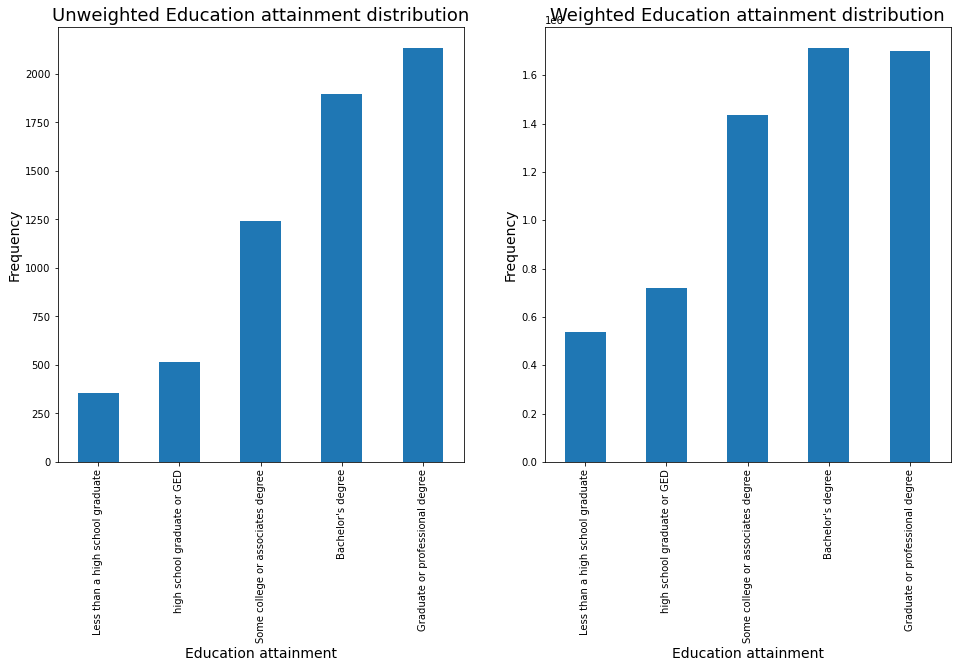

In [19]:
## Education
merge['EDUC'].value_counts()

# % of persons with no reported education (likely to be drop from the analysis )
no_edu = merge['EDUC'].isin([-8, -7, -1])
no_edu_pct = (merge[no_edu]['WTHHFIN'].sum()/population)*100
print ('Percentage of persons with no reported EDUC: {:.2f}%'.format(no_edu_pct))

#Drop no reporte income from analysis
edu_name = {-1: 'Appropriate skip', 
               1:'Less than a high school graduate',
               2:'high school graduate or GED',
               3:'Some college or associates degree',
               4:"Bachelor's degree",
               5:'Graduate or professional degree'}
fig, axs = plt.subplots(1,2, figsize = (16,8))
#Unweighted 
to_plot_0 = merge[~no_edu]['EDUC'].value_counts().sort_index().rename(edu_name, axis = 0)
to_plot_0.plot.bar(ax = axs[0])
axs[0].set_xlabel('Education attainment', fontsize = 14)
axs[0].set_ylabel('Frequency', fontsize = 14)
axs[0].set_title('Unweighted Education attainment distribution', fontsize = 18)

# Weighted
to_plot_1 = merge[~no_edu].groupby('EDUC').agg({'WTPERFIN':'sum'}).rename(edu_name, axis = 0)['WTPERFIN']
to_plot_1.plot.bar(ax = axs[1])
axs[1].set_xlabel('Education attainment', fontsize = 14)
axs[1].set_ylabel('Frequency', fontsize = 14)
axs[1].set_title('Weighted Education attainment distribution', fontsize = 18);

Percentage of persons with no SEX: 0.00%


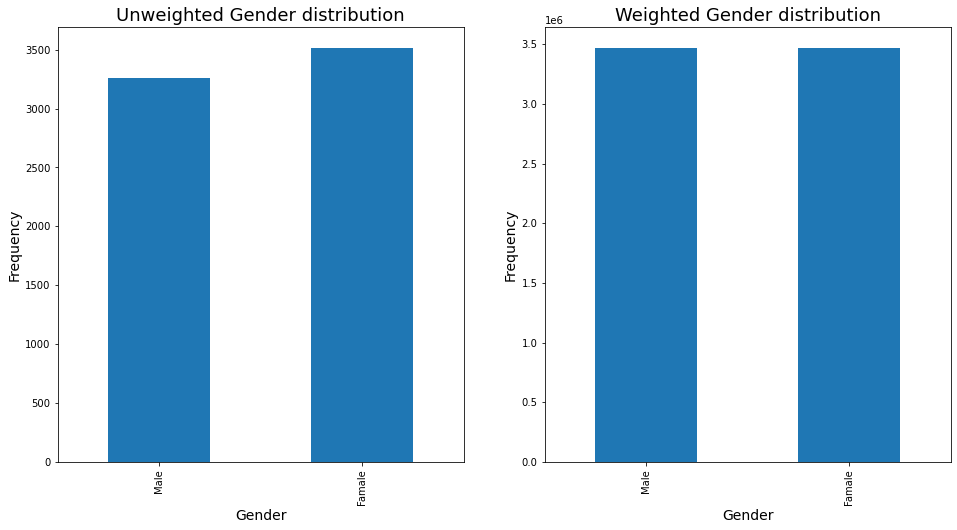

In [20]:
## Gender
merge['R_SEX']

# % of persons with no reported education (likely to be drop from the analysis )
no_edu = merge['R_SEX_IMP'].isin([-8, -7])
no_edu_pct = (merge[no_edu]['R_SEX_IMP'].sum()/population)*100
print ('Percentage of persons with no SEX: {:.2f}%'.format(no_edu_pct))

gender_name = {1: 'Male', 2:'Famale'}

fig, axs = plt.subplots(1,2, figsize = (16,8))
# Unweighted
to_plot_0 = merge['R_SEX_IMP'].value_counts().sort_index().rename(gender_name, axis = 0)
to_plot_0.plot.bar(ax = axs[0])
axs[0].set_xlabel('Gender', fontsize = 14)
axs[0].set_ylabel('Frequency', fontsize = 14)
axs[0].set_title('Unweighted Gender distribution', fontsize = 18)

# Weighted
to_plot_1 = merge.groupby('R_SEX_IMP').agg({'WTPERFIN':'sum'}).rename(gender_name, axis = 0)['WTPERFIN']
to_plot_1.plot.bar(ax = axs[1])
axs[1].set_xlabel('Gender', fontsize = 14)
axs[1].set_ylabel('Frequency', fontsize = 14)
axs[1].set_title('Weighted Gender distribution', fontsize = 18);


Geender distribution seems to match expected 50-50 distribution. 

### Sector 
- Variable:OCCAT ('Occupation category')
- Question: Which best describes [YOUR2] [PRIMARY] job?
- Appropiate skip: Asked if subject is a worker

Percentage of persons with no SECTOR info: 2.45%


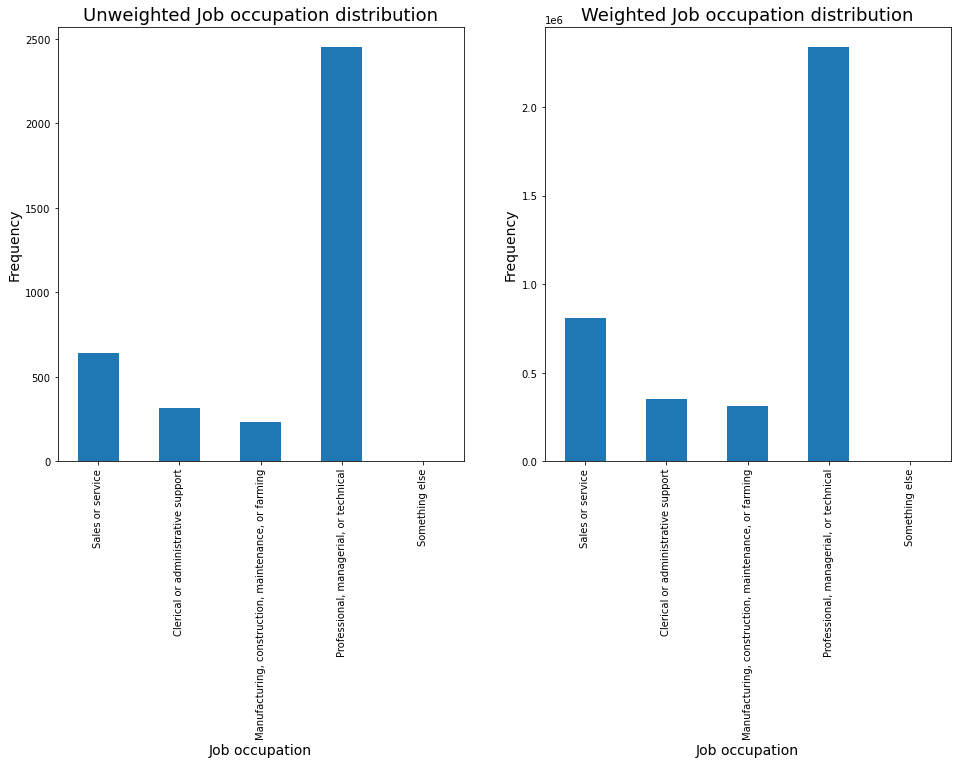

In [21]:
# % of persons with no reported education (likely to be drop from the analysis )
no_sector = merge['OCCAT'].isin([-9, -8, -7])
no_sector_pct = (no_sector.sum()/merge.shape[0])*100
print ('Percentage of persons with no SECTOR info: {:.2f}%'.format(no_sector_pct))

#INCLUDE APPROPIATE SKIPS
no_sector = merge['OCCAT'].isin([-9, -8, -7, -1])

sector_name = {1: 'Sales or service', 2:'Clerical or administrative support', 
               3:'Manufacturing, construction, maintenance, or farming', 
               4:'Professional, managerial, or technical', 97:'Something else'}

fig, axs = plt.subplots(1,2, figsize = (16,8))
# Unweighted
to_plot_0 = merge[~no_sector]['OCCAT'].value_counts().sort_index().rename(sector_name, axis = 0)
to_plot_0.plot.bar(ax = axs[0])
axs[0].set_xlabel('Job occupation', fontsize = 14)
axs[0].set_ylabel('Frequency', fontsize = 14)
axs[0].set_title('Unweighted Job occupation distribution', fontsize = 18)

# Weighted
to_plot_1 = merge[~no_sector].groupby('OCCAT').agg({'WTPERFIN':'sum'}).rename(sector_name, axis = 0)['WTPERFIN']
to_plot_1.plot.bar(ax = axs[1])
axs[1].set_xlabel('Job occupation', fontsize = 14)
axs[1].set_ylabel('Frequency', fontsize = 14)
axs[1].set_title('Weighted Job occupation distribution', fontsize = 18);

## Telework distribution 
- telework available 
- how many telework days in last 30 days 

### Telework option 
- Variable: WKRMHM
- Question: [DO_YOU_CAP] have the option of working from home or an alternate location instead of going into [YOUR_THEIR] [PRIMARY] workplace?
- Appropiate skip: Asked if subject is a worker and does not work from home

Percentage of persons with no WORK FROM HOME info: 55.05%


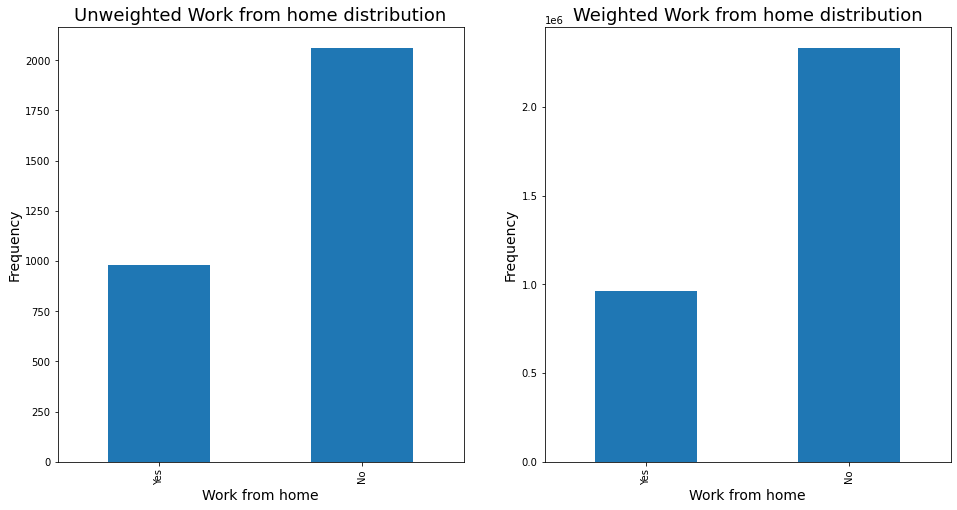

In [22]:
merge['WRK_HOME']


# % of persons with no reported education (likely to be drop from the analysis )
no_wfh = merge['WKRMHM'].isin([-9, -8, -7, -1])
no_wfh_pct = (no_wfh.sum()/merge.shape[0])*100
print ('Percentage of persons with no WORK FROM HOME info: {:.2f}%'.format(no_wfh_pct))

wfh_name = {-1: 'Appropriate skip', 1: 'Yes', 2:'No'}

fig, axs = plt.subplots(1,2, figsize = (16,8))

# Unweighted
to_plot_0 = merge[~no_wfh]['WKRMHM'].value_counts().sort_index().rename(wfh_name, axis = 0)
to_plot_0.plot.bar(ax = axs[0])
axs[0].set_xlabel('Work from home', fontsize = 14)
axs[0].set_ylabel('Frequency', fontsize = 14)
axs[0].set_title('Unweighted Work from home distribution', fontsize = 18)

# Weighted
to_plot_1 = merge[~no_wfh].groupby('WKRMHM').agg({'WTPERFIN':'sum'}).rename(wfh_name, axis = 0)['WTPERFIN']
to_plot_1.plot.bar(ax = axs[1])
axs[1].set_xlabel('Work from home', fontsize = 14)
axs[1].set_ylabel('Frequency', fontsize = 14)
axs[1].set_title('Weighted Work from home distribution', fontsize = 18);

## Day workign form home 
- Variable: WKFMHMXX
- Question: In the past 30 days, how many days did [YOU1] work only from home or an alternate work place?
- Appropiate skip: Asked if subject is a worker and teleworking is an option

In [23]:
# % of persons with no reported education (likely to be drop from the analysis )
no_wfhxx = merge['WKFMHMXX'].isin([-8, -7])
no_wfhxx_pct = (no_wfhxx.sum()/merge.shape[0])*100
print ('Percentage of persons with no WORK FROM HOME info: {:.2f}%'.format(no_wfhxx_pct))

#Also drop appripiate skips
no_wfhxx = merge['WKFMHMXX'].isin([-8, -7, - 1])


Percentage of persons with no WORK FROM HOME info: 0.06%


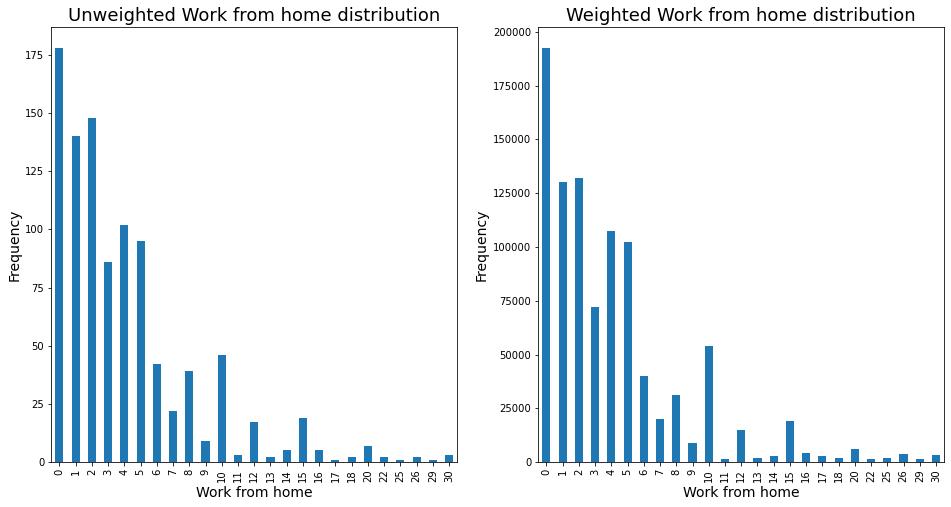

In [24]:
fig, axs = plt.subplots(1,2, figsize = (16,8))

# Unweighted
to_plot_0 = merge[~no_wfhxx]['WKFMHMXX'].value_counts().sort_index()
to_plot_0.plot.bar(ax = axs[0])
axs[0].set_xlabel('Work from home', fontsize = 14)
axs[0].set_ylabel('Frequency', fontsize = 14)
axs[0].set_title('Unweighted Work from home distribution', fontsize = 18)

# Weighted
to_plot_1 = merge[~no_wfhxx].groupby('WKFMHMXX').agg({'WTPERFIN':'sum'})['WTPERFIN']
to_plot_1.plot.bar(ax = axs[1])
axs[1].set_xlabel('Work from home', fontsize = 14)
axs[1].set_ylabel('Frequency', fontsize = 14)
axs[1].set_title('Weighted Work from home distribution', fontsize = 18);

Most people work few days a month. This would be a good model for pre-covid world. Although we will need survey help to update this models. 


Assume weeks of 5 days, and months of 4 weeks. 
- [0-4] - Once a week
- [5-8] - Twice a week 
- [9-12] - Three times a week 
- [13-16] - Four times a week
- [+17] - 5 times a week 

## Joint distribtution 



In [25]:
# Work from home option vs demographic variables 
df = merge[~no_wfh]#[['R_AGE_IMP','WKRMHM']]
df['wfh_option'] = df['WKRMHM'].replace({2:0})

## Age
df['age_cat'] = pd.cut(df['R_AGE_IMP'], bins = [16,25,40,60, np.inf],
                       labels = ['16-25', '25-40', '40-60', '+60'])

#Income
income_name = {1:'Less than $10,000',
               2:'$10,000 - $14,999',
               3:'$15,000 - $24,999',
               4:'$25,000 - $34,999',
               5:'$35,000 - $49,999',
               6:'$50,000 - $74,999',
               7:'$75,000 - $99,999',
               8:'$100,000 - $124,999',
               9:'$125,000 - $149,999',
               10:'$150,000 - $199,999',
               11:'$200,000 or more', 
               -7: np.nan, -8: np.nan,-9: np.nan,}
order = ['Less than $10,000','$10,000 - $14,999','$15,000 - $24,999','$25,000 - $34,999',
         '$35,000 - $49,999','$50,000 - $74,999','$75,000 - $99,999','$100,000 - $124,999',
         '$125,000 - $149,999','$150,000 - $199,999','$200,000 or more']

df['income_cat'] = merge['HHFAMINC'].replace(income_name)

#Education
edu_name = {-1: np.nan,-7: np.nan, -8: np.nan,-9: np.nan,
               1:'Less than a \n high school graduate',
               2:'high school \n graduate or GED',
               3:'Some college or \n associates degree',
               4:"Bachelor's degree",
               5:'Graduate or \n professional degree'}

edu_order = ['Less than a high \n school graduate','high school \n graduate or GED',
         'Some college or \n associates degree',"Bachelor's degree",
         'Graduate or \n professional degree']
df['education_cat'] = merge['EDUC'].replace(edu_name)

#Sex
gender_name = {1: 'Male', 2:'Famale', }
df['sex_cat'] = df['R_SEX_IMP'].replace(gender_name)

#Job occupation
sector_name = {1: 'Sales or service', 2:'Clerical or \n administrative\n support', 
               3:'Manufacturing,\n construction,\n maintenance, \n or farming', 
               4:'Professional,\n managerial,\n or technical', 97:'Something else',
               -1: np.nan,-7: np.nan, -8: np.nan,-9: np.nan,}

sector_order = ['Sales or service', 'Clerical or \n administrative\n support', 
         'Manufacturing,\n construction,\n maintenance, \n or farming', 
         'Professional,\n managerial,\n or technical', 'Something else']

df['sector_cat'] = df['OCCAT'].replace(sector_name)

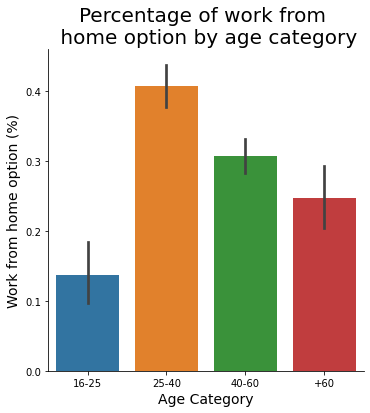

In [26]:
sns.catplot(x="age_cat", y="wfh_option", kind="bar", data=df)
plt.ylabel('Work from home option (%)',fontsize = 14);
plt.xlabel('Age Category',fontsize = 14)
plt.title('Percentage of work from \n home option by age category', fontsize = 20);

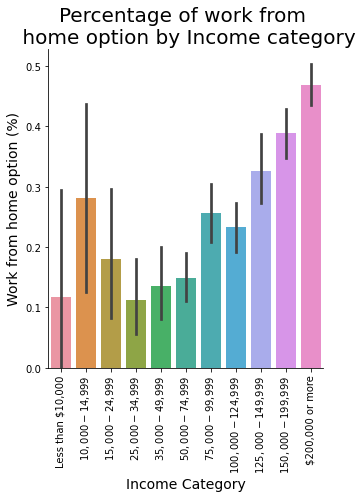

In [27]:
sns.catplot(x="income_cat", y="wfh_option", kind="bar", data=df, order = order)
plt.ylabel('Work from home option (%)',fontsize = 14);
plt.xlabel('Income Category',fontsize = 14)
plt.xticks(rotation = 90)
plt.title('Percentage of work from \n home option by Income category', fontsize = 20);

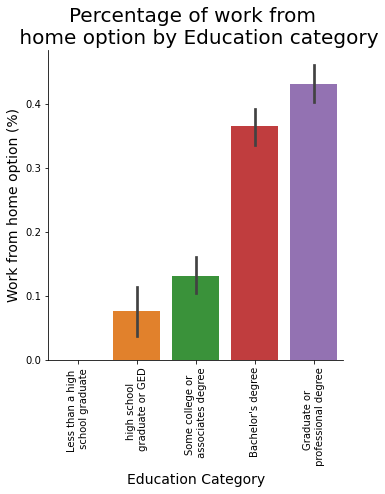

In [28]:
sns.catplot(x='education_cat', y="wfh_option", kind="bar", data=df, order = edu_order)
plt.ylabel('Work from home option (%)',fontsize = 14);
plt.xlabel('Education Category',fontsize = 14)
plt.xticks(rotation = 90)
plt.title('Percentage of work from \n home option by Education category', fontsize = 20);

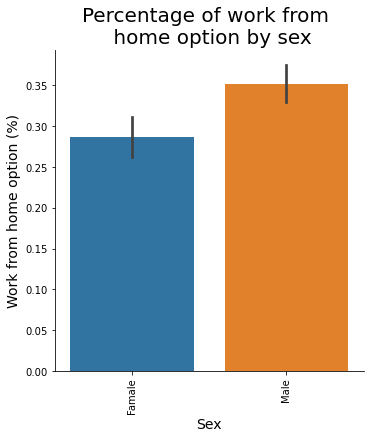

In [29]:
sns.catplot(x='sex_cat', y="wfh_option", kind="bar", data=df)
plt.ylabel('Work from home option (%)',fontsize = 14);
plt.xlabel('Sex',fontsize = 14)
plt.xticks(rotation = 90)
plt.title('Percentage of work from \n home option by sex', fontsize = 20);

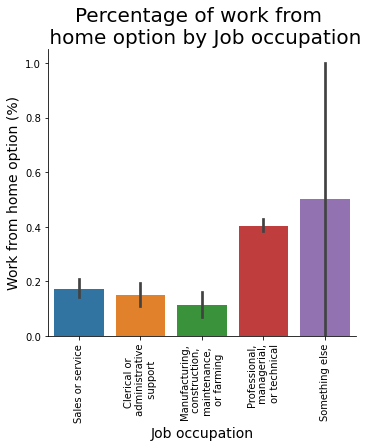

In [30]:
sns.catplot(x='sector_cat', y="wfh_option", kind="bar", data=df, order = sector_order)
plt.ylabel('Work from home option (%)',fontsize = 14);
plt.xlabel('Job occupation',fontsize = 14)
plt.xticks(rotation = 90)
plt.title('Percentage of work from \n home option by Job occupation', fontsize = 20);

## Number of days of telecommute
variable: WKFMHMXX
- [0-2]- Zero times a week
- [3-5] - Once a week
- [6-12] - 2 - 3 times a week 
- [+ 12] - +4 times a week 


In [59]:
#Drop variable not importnat
#Cut in bins 
# plit with ither variables 

#sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic) We can also add hue here.. yayy :) 

# Work from home option vs demographic variables 
# df = merge[~no_wfh]#[['R_AGE_IMP','WKRMHM']]
# df['wfh_option'] = df['WKRMHM'].replace({2:0})

# ## Age
# df['age_cat'] = pd.cut(df['R_AGE_IMP'], bins = [16,25,40,60, np.inf],
#                        labels = ['16-25', '25-40', '40-60', '+60'])

wfh_replace = {-1: np.nan, -8: np.nan,}
day_wfh = df['WKFMHMXX'].replace(wfh_replace)
df['day_wfh'] = pd.cut(day_wfh, bins = [0,2,5,12,np.inf], labels = [0, 1, 2,3])

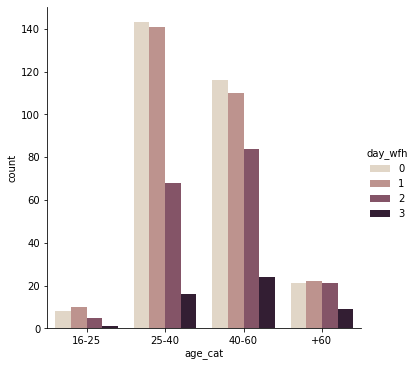

In [60]:
# "strip", "swarm", "box", "violin",
#    "boxen", "point", "bar", or "count".
sns.catplot(x='age_cat', hue = "day_wfh", kind="count", palette="ch:.25", data=df)

In [92]:
a = df.dropna(subset = ['day_wfh'])
a['day_wfh'] = a['day_wfh'].astype(int)

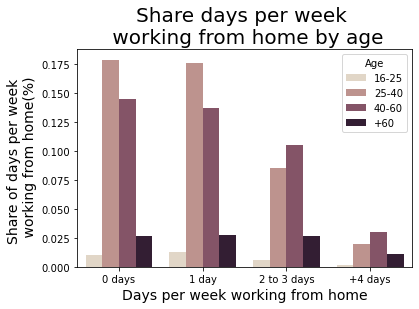

In [86]:
sns.barplot(x='day_wfh', y = 'day_wfh', hue = 'age_cat', palette="ch:.25", data=a, 
            estimator=lambda x: len(x) / len(a))
plt.ylabel('Share of days per week \n working from home(%)',fontsize = 14);
plt.xlabel('Days per week working from home',fontsize = 14)
plt.xticks([0, 1, 2,3],['0 days', '1 day', '2 to 3 days', '+4 days'])
plt.title('Share days per week \n working from home by age', fontsize = 20)
plt.legend(title = 'Age');

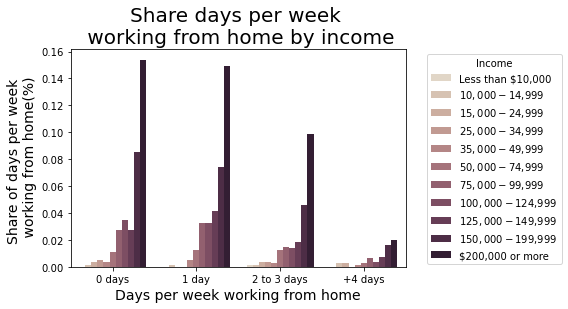

In [98]:
sns.barplot(x='day_wfh', y = 'day_wfh', hue = 'income_cat', palette="ch:.25", data=a, 
            estimator=lambda x: len(x) / len(a), hue_order = order)
plt.ylabel('Share of days per week \n working from home(%)',fontsize = 14);
plt.xlabel('Days per week working from home',fontsize = 14)
plt.xticks([0, 1, 2,3],['0 days', '1 day', '2 to 3 days', '+4 days'])
plt.title('Share days per week \n working from home by income', fontsize = 20)
plt.legend(title = 'Income', bbox_to_anchor=(1.05, 1.0), loc='upper left');

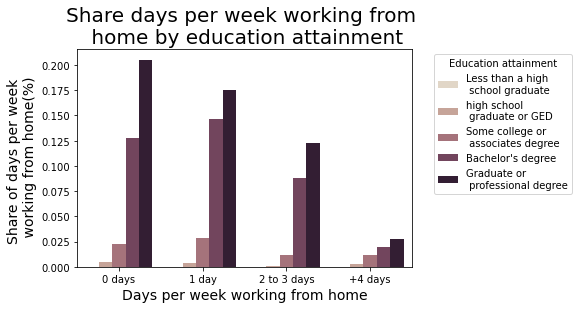

In [101]:
sns.barplot(x='day_wfh', y = 'day_wfh', hue = 'education_cat', palette="ch:.25", data=a, 
            estimator=lambda x: len(x) / len(a), hue_order = edu_order)
plt.ylabel('Share of days per week \n working from home(%)',fontsize = 14);
plt.xlabel('Days per week working from home',fontsize = 14)
plt.xticks([0, 1, 2,3],['0 days', '1 day', '2 to 3 days', '+4 days'])
plt.title('Share days per week working from \n home by education attainment', fontsize = 20)
plt.legend(title = 'Education attainment',  bbox_to_anchor=(1.05, 1.0), loc='upper left');

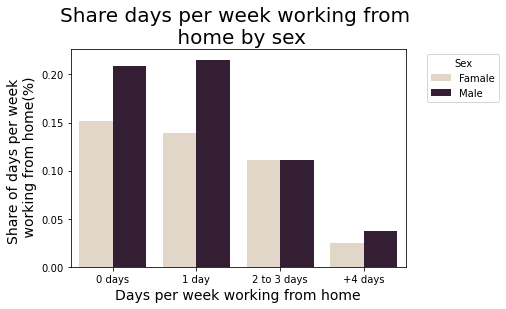

In [104]:
sns.barplot(x='day_wfh', y = 'day_wfh', hue = 'sex_cat', palette="ch:.25", data=a, 
            estimator=lambda x: len(x) / len(a))
plt.ylabel('Share of days per week \n working from home(%)',fontsize = 14);
plt.xlabel('Days per week working from home',fontsize = 14)
plt.xticks([0, 1, 2,3],['0 days', '1 day', '2 to 3 days', '+4 days'])
plt.title('Share days per week working from \n home by sex', fontsize = 20)
plt.legend(title = 'Sex',  bbox_to_anchor=(1.05, 1.0), loc='upper left');

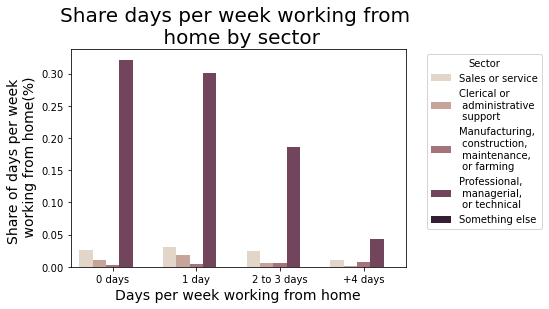

In [108]:
sns.barplot(x='day_wfh', y = 'day_wfh', hue = 'sector_cat', palette="ch:.25", data=a, 
            estimator=lambda x: len(x) / len(a), hue_order = sector_order)
plt.ylabel('Share of days per week \n working from home(%)',fontsize = 14);
plt.xlabel('Days per week working from home',fontsize = 14)
plt.xticks([0, 1, 2,3],['0 days', '1 day', '2 to 3 days', '+4 days'])
plt.title('Share days per week working from \n home by sector', fontsize = 20)
plt.legend(title = 'Sector',  bbox_to_anchor=(1.05, 1.0), loc='upper left');